### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### Importing the necessary packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from matplotlib import pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Reading 3 datasets into dataframes

In [2]:
os.chdir("E:\AI-ML\Foundations for AIML")
user_df = pd.read_csv('user.csv')
item_df = pd.read_csv('item.csv')
data_df = pd.read_csv('data.csv')

#### Apply info, shape, describe, and find the number of missing values in the data

In [3]:
user_df.info
item_df.info
data_df.info
user_df.shape
item_df.shape
data_df.shape
user_df.describe()
item_df.describe()
data_df.describe()

<bound method DataFrame.info of      user id  age gender     occupation zip code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
5          6   42      M      executive    98101
6          7   57      M  administrator    91344
7          8   36      M  administrator    05201
8          9   29      M        student    01002
9         10   53      M         lawyer    90703
10        11   39      F          other    30329
11        12   28      F          other    06405
12        13   47      M       educator    29206
13        14   45      M      scientist    55106
14        15   49      F       educator    97301
15        16   21      M  entertainment    10309
16        17   30      M     programmer    06355
17        18   35      F          other    37212
18        19   40      M      librari

<bound method DataFrame.info of       movie id                                     movie title release date  \
0            1                                      Toy Story   01-Jan-1995   
1            2                                      GoldenEye   01-Jan-1995   
2            3                                     Four Rooms   01-Jan-1995   
3            4                                     Get Shorty   01-Jan-1995   
4            5                                        Copycat   01-Jan-1995   
5            6  Shanghai Triad (Yao a yao yao dao waipo qiao)   01-Jan-1995   
6            7                                 Twelve Monkeys   01-Jan-1995   
7            8                                           Babe   01-Jan-1995   
8            9                               Dead Man Walking   01-Jan-1995   
9           10                                    Richard III   22-Jan-1996   
10          11                                  Seven (Se7en)   01-Jan-1995   
11          12      

<bound method DataFrame.info of        user id  movie id  rating  timestamp
0          196       242       3  881250949
1          186       302       3  891717742
2           22       377       1  878887116
3          244        51       2  880606923
4          166       346       1  886397596
5          298       474       4  884182806
6          115       265       2  881171488
7          253       465       5  891628467
8          305       451       3  886324817
9            6        86       3  883603013
10          62       257       2  879372434
11         286      1014       5  879781125
12         200       222       5  876042340
13         210        40       3  891035994
14         224        29       3  888104457
15         303       785       3  879485318
16         122       387       5  879270459
17         194       274       2  879539794
18         291      1042       4  874834944
19         234      1184       2  892079237
20         119       392       4  886176814


(943, 5)

(1681, 22)

(100000, 4)

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [4]:
user_df.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

In [5]:
item_df.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [6]:
data_df.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

#### Finding number of movies per genre using the item data

In [7]:
# use sum on the default axis
# droping these 3 columns as they are not actually categories
new_item_df = item_df.drop(["movie id", "movie title", "release date"],axis=1) 
new_item_df.sum().sort_values(ascending=False)

Drama          725
Comedy         505
Thriller       251
Action         251
Romance        247
Adventure      135
Childrens      122
Crime          109
Sci-Fi         101
Horror          92
War             71
Mystery         61
Musical         56
Documentary     50
Animation       42
Western         27
Film-Noir       24
Fantasy         22
unknown          1
dtype: int64

#### Finding movies that have more than one genre

In [8]:
#hint: use sum on the axis = 1
new_item_df_1 = item_df.drop(["movie id", "release date"], axis=1)
new_item_df_2 = new_item_df_1[new_item_df_1.sum(axis=1) > 1]
new_item_df_2['movie title']

0                                 Toy Story 
1                                 GoldenEye 
3                                Get Shorty 
4                                   Copycat 
6                            Twelve Monkeys 
7                                      Babe 
9                               Richard III 
10                            Seven (Se7en) 
11                      Usual Suspects, The 
13                              Postino, Il 
15              French Twist (Gazon maudit) 
16                      From Dusk Till Dawn 
19                       Angels and Insects 
20                   Muppet Treasure Island 
21                               Braveheart 
22                              Taxi Driver 
23                      Rumble in the Bronx 
27                                Apollo 13 
28                           Batman Forever 
30                             Crimson Tide 
32                                Desperado 
33                     Doom Generation, The 
34        

#### Droping the movie where the genre is unknown

In [9]:
new_item_df_3 = item_df.drop(item_df[item_df['unknown'] == 1].index)
print('Length of Data Frame after droping movie where genre is unknown is', len(new_item_df_3))
print('Original Data Frame length is',len(item_df))

Length of Data Frame after droping movie where genre is unknown is 1680
Original Data Frame length is 1681


### Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation'

In [10]:
# HINT: use distplot for age, release date and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below

In [11]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


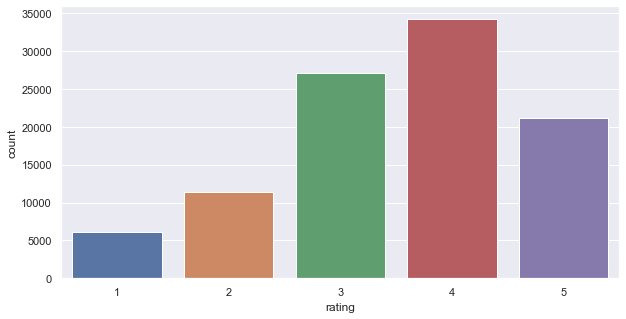

In [12]:
c = item_df['release date'].str.split("-", n=2, expand = True)
item_df['release year'] = c[2]
%matplotlib inline
sns.set(color_codes=True)
plt.figure(figsize=(10,5))
sns.countplot(data_df['rating']);

In [13]:
item_df.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995


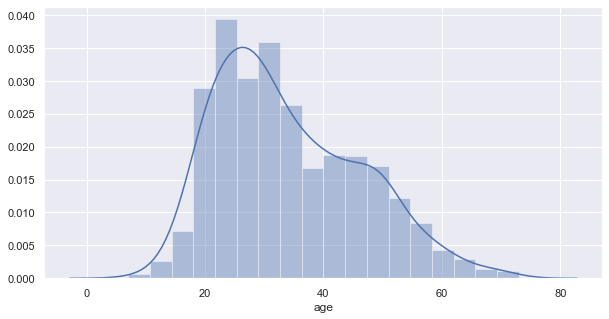

In [14]:
plt.figure(figsize=(10,5))
sns.distplot(user_df['age']);

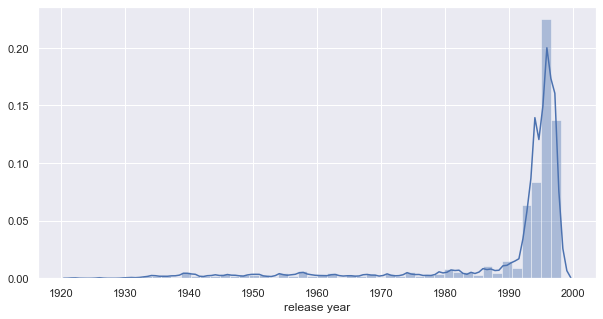

In [15]:
plt.figure(figsize=(10,5))
item_df['release year'] = item_df['release year'].astype(int)
item_df.dtypes
sns.distplot(item_df['release year']);

<Figure size 720x360 with 0 Axes>

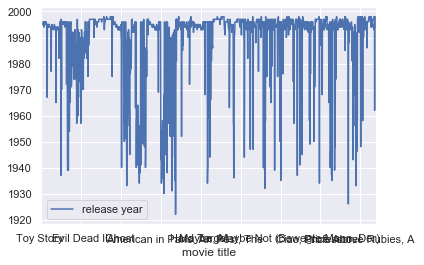

In [19]:
plt.figure(figsize=(10,5));
item_df.plot(x="movie title", y="release year")
plt.show();

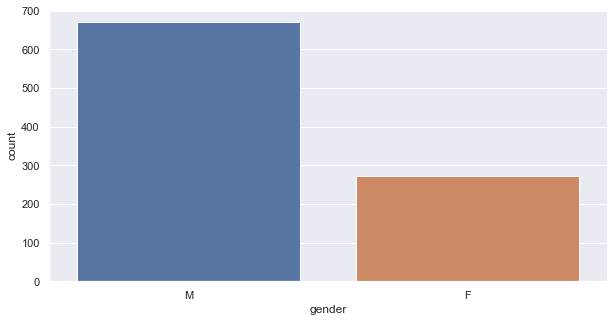

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(user_df['gender']);

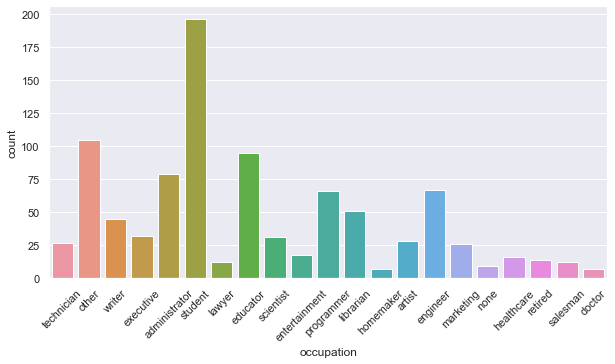

In [21]:
plt.figure(figsize=(10,5))
chart = sns.countplot(user_df['occupation']);
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

### Visualizing how popularity of genres has changed over the years

#### Note that we need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1933,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1934,0,0,0,0,0,2,0,0,1,0,0,0,1,1,1,0,0,0,0
1935,0,0,0,0,0,2,0,0,0,0,0,1,1,0,1,0,1,0,0
1936,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


<Figure size 720x360 with 0 Axes>

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


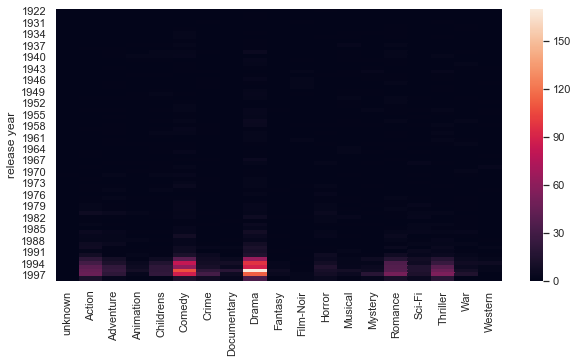

In [22]:
new_item_df_4 = item_df.drop(["movie id", "movie title", "release date"], axis=1)
#new_item_df_4 = new_item_df_4.drop("yearly_growth", axis=1)
new_item_df_5 = new_item_df_4.groupby('release year').sum()
new_item_df_5
plt.figure(figsize=(10,5))
sns.heatmap(new_item_df_5);
new_item_df_5.head()

#yearly_growth = item_df['release year'].value_counts()
#sns.countplot(yearly_growth)
#yearly_growth.loc[:,1]

### Finding the top 25 movies, each having a minimum of 100 ratings

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: You might need to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [23]:
item_data_merged_df = pd.merge(item_df, data_df, on='movie id', how='inner')
rating_count = item_data_merged_df.groupby('movie title')['rating'].count().reset_index()
rating_count = rating_count[rating_count['rating'] > 100]
rating_average = item_data_merged_df.groupby('movie title')['rating'].mean().sort_values(ascending = False).reset_index()
matched_movies = rating_average[rating_average['movie title'].isin(rating_count['movie title'])]
matched_movies.head(25)

,movie title,rating
15,"Close Shave, A",4.491071
16,Schindler's List,4.466443
17,"Wrong Trousers, The",4.466102
18,Casablanca,4.456790
20,"Shawshank Redemption, The",4.445230
21,Rear Window,4.387560
22,"Usual Suspects, The",4.385768
23,Star Wars,4.358491
24,12 Angry Men,4.344000
28,Citizen Kane,4.292929


### See gender distribution across different genres check for the validity of the below statements

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


In [24]:
user_data_merged_df = pd.merge(user_df, data_df, on = 'user id', how = 'inner')
item_user_data_merged_df = pd.merge(item_df, user_data_merged_df, on = 'movie id', how = 'inner')
item_user_data_merged_df_drama = item_user_data_merged_df[item_user_data_merged_df['Drama'] ==1]
item_user_data_merged_df_scifi = item_user_data_merged_df[item_user_data_merged_df['Sci-Fi'] ==1]
item_user_data_merged_df_Romance = item_user_data_merged_df[item_user_data_merged_df['Romance'] ==1]
total_gender_rating = item_user_data_merged_df.groupby(['gender'])['rating'].count()
total_gender_rating_drama = item_user_data_merged_df_drama.groupby(['gender'])['rating'].count()
total_gender_rating_scifi = item_user_data_merged_df_scifi.groupby(['gender'])['rating'].count()
total_gender_rating_romance = item_user_data_merged_df_Romance.groupby(['gender'])['rating'].count()
print("Total Rating Count b/w Male & Female:\n",total_gender_rating)
print("Rating Count for Drama Category:\n",total_gender_rating_drama)
print("Rating Count for Sci-Fi Category:\n",total_gender_rating_scifi)
print("Rating Count for Romance Category:\n",total_gender_rating_romance)
print("Drama Distribution b/w Male & Female in %:\n",total_gender_rating_drama.div(total_gender_rating, level='total_gender_rating') * 100)
print("Sci-Fi Distribution b/w Male & Female in %:\n",total_gender_rating_scifi.div(total_gender_rating, level='total_gender_rating') * 100)
print("Romance Distribution b/w Male & Female in %:\n",total_gender_rating_romance.div(total_gender_rating, level='total_gender_rating') * 100)



Total Rating Count b/w Male & Female:
 gender
F    25738
M    74253
Name: rating, dtype: int64
Rating Count for Drama Category:
 gender
F    11008
M    28887
Name: rating, dtype: int64
Rating Count for Sci-Fi Category:
 gender
F     2629
M    10101
Name: rating, dtype: int64
Rating Count for Romance Category:
 gender
F     5858
M    13603
Name: rating, dtype: int64
Drama Distribution b/w Male & Female in %:
 gender
F    42.769446
M    38.903479
Name: rating, dtype: float64
Sci-Fi Distribution b/w Male & Female in %:
 gender
F    10.214469
M    13.603491
Name: rating, dtype: float64
Romance Distribution b/w Male & Female in %:
 gender
F    22.760121
M    18.319799
Name: rating, dtype: float64


#### Conclusion:



Women watch more drama than Men because Women Rating Percentage for Drama is around 43%, while Men %age is around 39%.
Men watch more Sci-Fi than Women because Men Rating Percentage for Sci-Fi is 13%, while Women %age is 10%.
Women watch more Romance than Men because Women Rating Percentage for Romance is around 23%, while Men %age is 18%.